In [115]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

In [116]:
train_x = np.array([i + 1 for i in range(17)]) # 1 ~ 17
train_y = np.array([4,3.5,3,3.5,3,2,2,3,4,5,6,7,8,9,10,11,10])
train_y = np.array([i * 2 for i in train_y])

print(train_x)
print(type(train_y))
print(train_y)

m = train_x.mean()
std = train_x.std()
def standardize(x):
    return (x - m) / std 

train_z = standardize(train_x) 
print(train_z)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
<class 'numpy.ndarray'>
[ 8.  7.  6.  7.  6.  4.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 20.]
[-1.63299316 -1.42886902 -1.22474487 -1.02062073 -0.81649658 -0.61237244
 -0.40824829 -0.20412415  0.          0.20412415  0.40824829  0.61237244
  0.81649658  1.02062073  1.22474487  1.42886902  1.63299316]


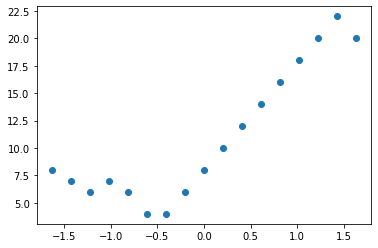

In [117]:
plt.plot(train_z, train_y, 'o')
plt.show()

In [118]:
# Parameter: defined automatically
# random starting point (normalized distribution)
np.random.seed(0)
a = np.random.randn(1) [0]
b = np.random.randn(1) [0]

print('a:', a, ' b:', b)

a: 1.764052345967664  b: 0.4001572083672233


In [119]:
def f(x):
    return a * x + b

def E(x, y):
    err = (y - f(x)) ** 2
    return np.sum(err) / 2 # reduce error scale => reduce effect of outlier 

# Hyper Parameter: defined by developer
ETA = 0.01  # learning rate
errDiff = 1 
cnt = 0  # times of learning

print('train_z: ', f(train_z))

train_z:  [-2.48052821 -2.12044253 -1.76035686 -1.40027118 -1.0401855  -0.68009982
 -0.32001415  0.04007153  0.40015721  0.76024289  1.12032856  1.48041424
  1.84049992  2.20058559  2.56067127  2.92075695  3.28084263]


In [120]:
listaDiff = [] 
listbDiff = [] 
lista = [] 
listb = [] 
listErr = []

e = E(train_z, train_y)
while errDiff > 0.01: 
    # y^ = ax + b
    # w - (-(y - y^) * x)   =>  w + (( y - y^) * x)
    a_one = ETA * np.sum(((train_y - f(train_z)) * train_z)) # derivative 미분 ???
    a += a_one
    
    # b - (-(y - y^) * 1)   =>  b + (( y - y^) * 1)
    b_one = ETA * np.sum((train_y - f(train_z)) * 1)
    b += b_one
    
    errModified = E(train_z, train_y) 
    errDiff = abs(e - errModified)
    e = errModified         
    cnt += 1         

    listaDiff.append(a_one)
    listbDiff.append(b_one)
    lista.append(a)
    listb.append(b)
    listErr.append(e)
    
    fmt = 'cnt:{0},  a:{1:.3f}, b:{2:.3f}, errDiff:{3: .3f}'
    print(fmt.format(cnt, a, b, errDiff))  
    
# ETA = 2    
# cnt:1,  a:117.333, b:362.795, errDiff:-1158621.356    

# ETA = 0.05
# cnt:1,  a:5.087, b:10.819, errDiff: 69.416
# cnt:2,  a:5.152, b:11.023, errDiff: 0.526
# cnt:3,  a:5.161, b:11.053, errDiff: 0.012
# cnt:4,  a:5.163, b:11.058, errDiff: 0.000

cnt:1,  a:2.342, b:2.212, errDiff: 330.969
cnt:2,  a:2.822, b:3.716, errDiff: 228.005
cnt:3,  a:3.220, b:4.964, errDiff: 157.073
cnt:4,  a:3.550, b:6.000, errDiff: 108.207
cnt:5,  a:3.824, b:6.860, errDiff: 74.544
cnt:6,  a:4.052, b:7.574, errDiff: 51.353
cnt:7,  a:4.241, b:8.166, errDiff: 35.377
cnt:8,  a:4.398, b:8.658, errDiff: 24.371
cnt:9,  a:4.528, b:9.066, errDiff: 16.789
cnt:10,  a:4.636, b:9.405, errDiff: 11.566
cnt:11,  a:4.725, b:9.686, errDiff: 7.968
cnt:12,  a:4.800, b:9.920, errDiff: 5.489
cnt:13,  a:4.862, b:10.113, errDiff: 3.781
cnt:14,  a:4.913, b:10.274, errDiff: 2.605
cnt:15,  a:4.955, b:10.407, errDiff: 1.795
cnt:16,  a:4.991, b:10.518, errDiff: 1.236
cnt:17,  a:5.020, b:10.610, errDiff: 0.852
cnt:18,  a:5.044, b:10.686, errDiff: 0.587
cnt:19,  a:5.065, b:10.750, errDiff: 0.404
cnt:20,  a:5.081, b:10.802, errDiff: 0.278
cnt:21,  a:5.095, b:10.846, errDiff: 0.192
cnt:22,  a:5.107, b:10.882, errDiff: 0.132
cnt:23,  a:5.116, b:10.912, errDiff: 0.091
cnt:24,  a:5.124, 

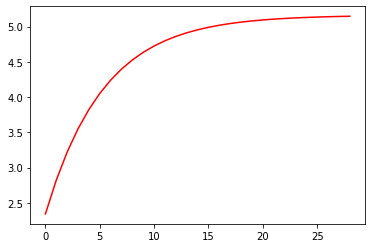

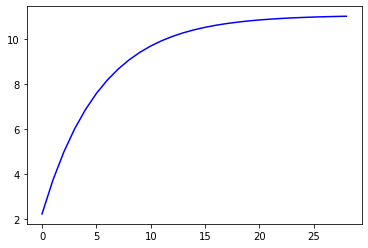

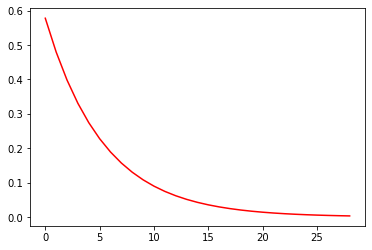

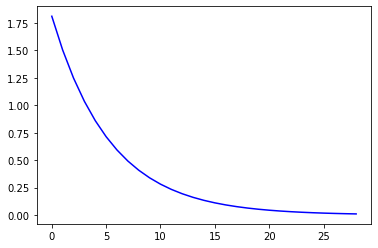

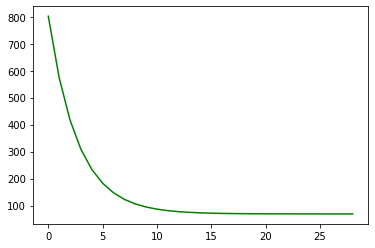

f(x) = 5.148 * X + 11.011


In [124]:
plt.plot(range(cnt), lista, color='red')
plt.show()
plt.plot(range(cnt), listb, color='blue')
plt.show()
plt.plot(range(cnt), listaDiff, color='red')
plt.show()
plt.plot(range(cnt), listbDiff, color='blue')
plt.show()
plt.plot(range(cnt), listErr, color='green')
plt.show()

<class 'module'>
new_y: 19.9426446919897771
new_y: 20


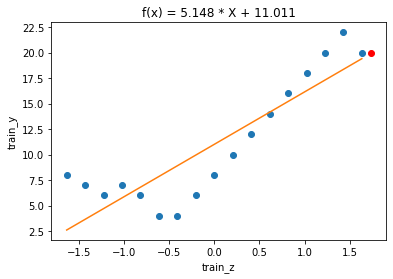

In [126]:
startx = np.min(train_z)
endx = np.max(train_z)
starty = f(startx)
endy = f(endx)

new_x = standardize(17.5)
new_y = f(new_x)
print(type(pd))
print('new_y: {0:.16f}'.format(new_y))
print('new_y: {0:.0f}'.format(new_y))
# plt.plot()

plt.plot(train_z, train_y, 'o')
plt.plot([startx, endx], [starty, endy])  # 선형회귀 직선
plt.plot(new_x, new_y, 'ro')
plt.title('f(x) = {0:.3f} * X + {1:.3f}'.format(a, b))
plt.xlabel('train_z')
plt.ylabel('train_y')
plt.show()